In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer;
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns = np.append(cancer['feature_names'],'target'));

In [6]:
df_cancer.head() 

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

#Visualizing data

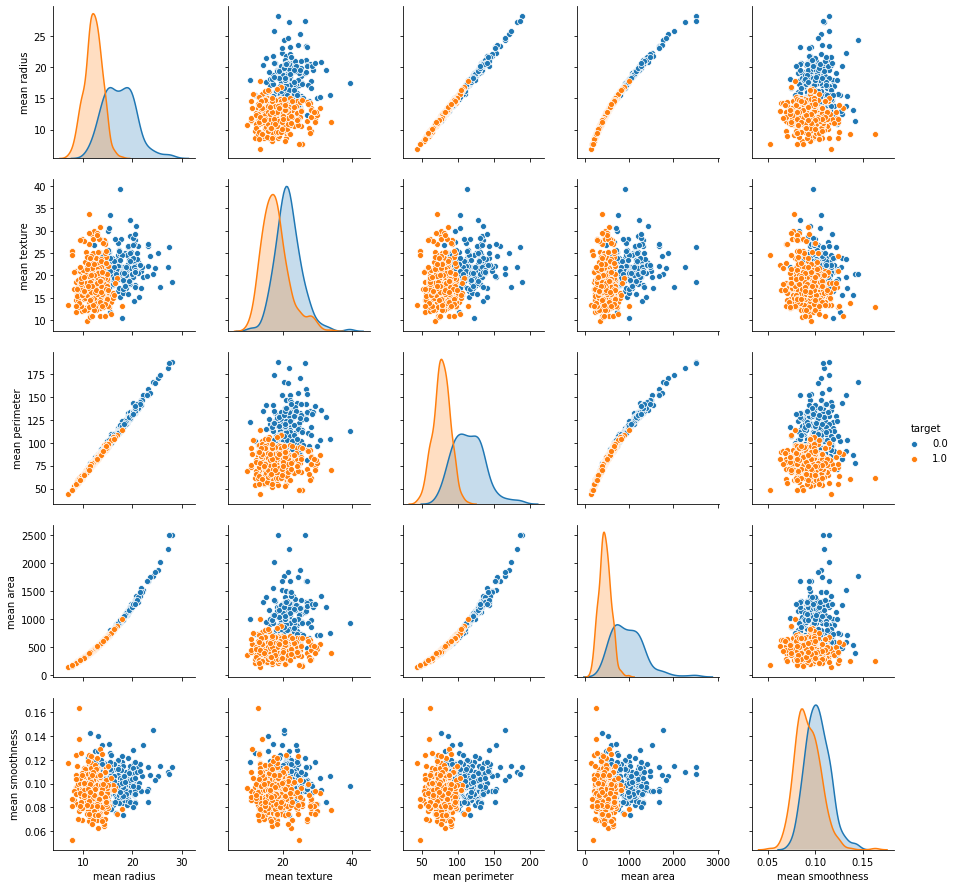

In [11]:
sns.pairplot(df_cancer, hue='target' , vars=cancer['feature_names'][:5])

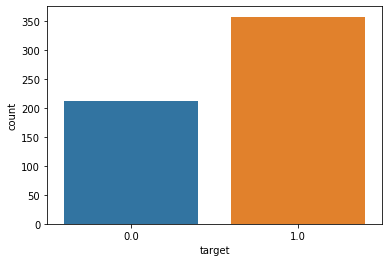

In [12]:
sns.countplot(df_cancer['target'])

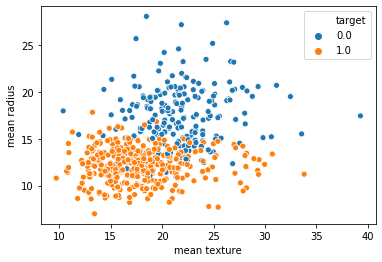

In [14]:
sns.scatterplot(data=df_cancer , x='mean texture',y='mean radius',hue='target')

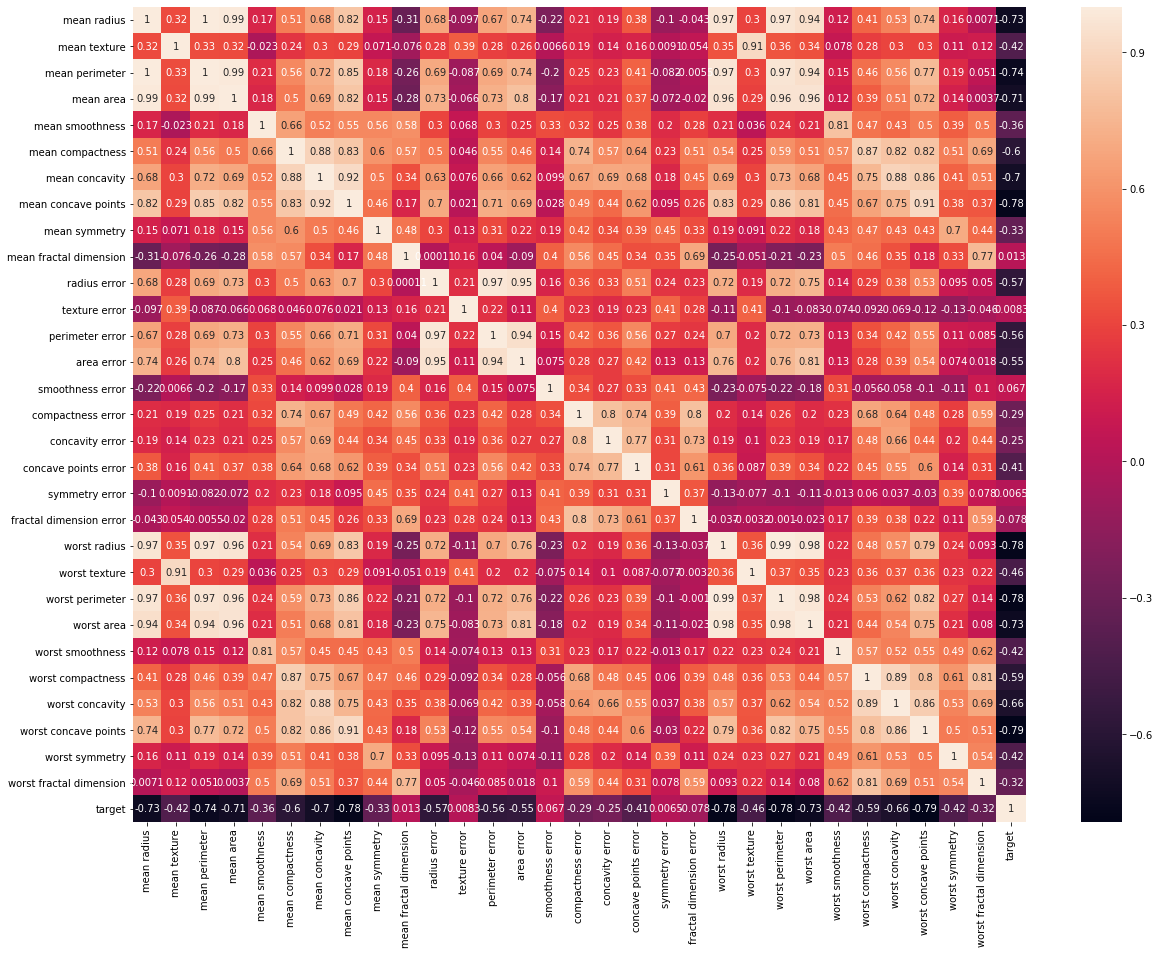

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer.corr(),annot=True)

In [26]:
x = df_cancer.iloc[:,:-1]
x.head()


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [27]:
y = df_cancer.iloc[:,-1]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [28]:
#Train the Model
#1. split the data
from sklearn.model_selection import train_test_split

In [48]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x , y , test_size=0.2, random_state=5 )

In [49]:
Xtrain.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
306        13.20         15.82           84.07      537.3          0.08511   
410        11.36         17.57           72.49      399.8          0.08858   
197        18.08         21.84          117.40     1024.0          0.07371   
376        10.57         20.22           70.15      338.3          0.09073   
244        19.40         23.50          129.10     1155.0          0.10270   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
306           0.05251        0.001461             0.003261         0.1632   
410           0.05313        0.027830             0.021000         0.1601   
197           0.08642        0.110300             0.057780         0.1770   
376           0.16600        0.228000             0.059410         0.2188   
244           0.15580        0.204900             0.088860         0.1978   

     mean fractal dimension  ...  worst radius  worst texture  \
306                 0.05894  ...         14.41          20.45   
410                 0.05913  ...         13.05          36.32   
197                 0.05340  ...         19.76          24.70   
376                 0.08450  ...         10.85          22.82   
244                 0.06000  ...         21.65          30.53   

     worst perimeter  worst area  worst smoothness  worst compactness  \
306            92.00       636.9           0.11280             0.1346   
410            85.07       521.3           0.14530             0.1622   
197           129.10      1228.0           0.08822             0.1963   
376            76.51       351.9           0.11430             0.3619   
244           144.90      1417.0           0.14630             0.2968   

     worst concavity  worst concave points  worst symmetry  \
306           0.0112               0.02500          0.2651   
410           0.1811               0.08698          0.2973   
197           0.2535               0.09181          0.2369   
376           0.6030               0.14650          0.2597   
244           0.3458               0.15640          0.2920   

     worst fractal dimension  
306                  0.08385  
410                  0.07745  
197                  0.06558  
376                  0.12000  
244                  0.07614  

[5 rows x 30 columns]

In [50]:
Xtest.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
28         15.30         25.27          102.40      732.4          0.10820   
163        12.34         22.22           79.85      464.5          0.10120   
123        14.50         10.89           94.28      640.7          0.11010   
361        13.30         21.57           85.24      546.1          0.08582   
549        10.82         24.21           68.89      361.6          0.08192   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
28            0.16970         0.16830              0.08751         0.1926   
163           0.10150         0.05370              0.02822         0.1551   
123           0.10990         0.08842              0.05778         0.1856   
361           0.06373         0.03344              0.02424         0.1815   
549           0.06602         0.01548              0.00816         0.1976   

     mean fractal dimension  ...  worst radius  worst texture  \
28                  0.06540  ...         20.27          36.71   
163                 0.06761  ...         13.58          28.68   
123                 0.06402  ...         15.70          15.98   
361                 0.05696  ...         14.20          29.20   
549                 0.06328  ...         13.03          31.45   

     worst perimeter  worst area  worst smoothness  worst compactness  \
28            149.30      1269.0            0.1641             0.6110   
163            87.36       553.0            0.1452             0.2338   
123           102.80       745.5            0.1313             0.1788   
361            92.94       621.2            0.1140             0.1667   
549            83.90       505.6            0.1204             0.1633   

     worst concavity  worst concave points  worst symmetry  \
28           0.63350               0.20240          0.4027   
163          0.16880               0.08194          0.2268   
123          0.25600               0.12210          0.2889   
361          0.12120               0.05614          0.2637   
549          0.06194               0.03264          0.3059   

     worst fractal dimension  
28                   0.09876  
163                  0.09082  
123                  0.08006  
361                  0.06658  
549                  0.07626  

[5 rows x 30 columns]

In [51]:
#Train data
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
svc_model = SVC()

In [53]:
svc_model.fit(Xtrain, Ytrain)

C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
Ypredict = svc_model.predict(Xtest)

In [73]:
confusion_matrix(Ypredict, Ytest)

array([[ 0,  0],
       [48, 66]], dtype=int64)

In [74]:
min_train = Xtrain.min() 
range_train = (Xtrain - min_train).max()
X_train_scaled = (Xtrain - min_train)/range_train

In [75]:
min_train.head() , range_train.head()

(mean radius          6.98100
 mean texture         9.71000
 mean perimeter      43.79000
 mean area          143.50000
 mean smoothness      0.05263
 dtype: float64,
 mean radius          21.12900
 mean texture         29.57000
 mean perimeter      144.71000
 mean area          2355.50000
 mean smoothness       0.11077
 dtype: float64)

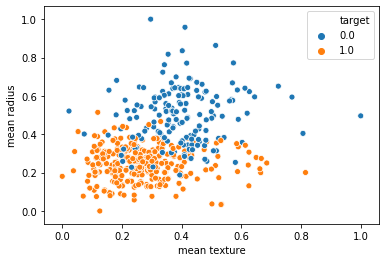

In [76]:
sns.scatterplot(data=X_train_scaled , x='mean texture',y='mean radius',hue=Ytrain)

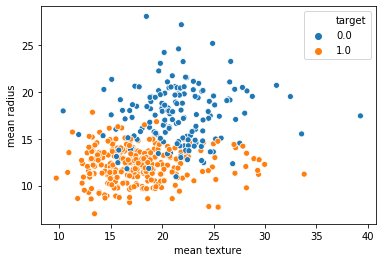

In [77]:
sns.scatterplot(data=Xtrain , x='mean texture',y='mean radius',hue=Ytrain)

In [78]:
min_test = Xtest.min() 
range_test = (Xtest - min_test).max()
X_test_scaled = (Xtest - min_test)/range_test

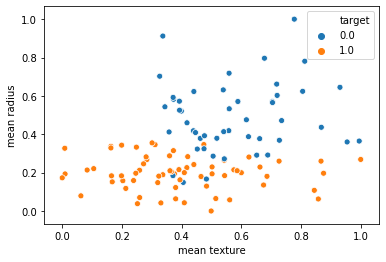

In [80]:
sns.scatterplot(data=X_test_scaled , x='mean texture',y='mean radius',hue=Ytest)

In [81]:
svc_model.fit(X_train_scaled, Ytrain)

C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [82]:
y_predict = svc_model.predict(X_test_scaled)

In [84]:
cm = confusion_matrix(Ytest, y_predict)

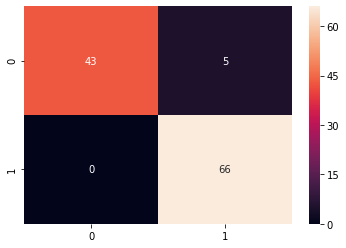

In [86]:
sns.heatmap(cm,annot=True)

In [87]:
print(classification_report(Ytest, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        48
         1.0       0.93      1.00      0.96        66

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [89]:
param_grid = {'C': [0.1,1,100] ,'gamma':[1,0.1,0.01,0.001] ,'kernel':['rbf'] }

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
grid = GridSearchCV(SVC(), param_grid, refit=True , verbose=4)

In [92]:
grid.fit(X_train_scaled,Ytrain)

C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9671052631578947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9210526315789473, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9470198675496688, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9144736842105263, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8675496688741722, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [93]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [95]:
grid_predictions = grid.predict(X_test_scaled)

In [96]:
cm = confusion_matrix(Ytest, grid_predictions)

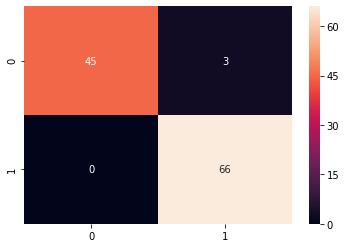

In [99]:
sns.heatmap(cm, annot=True)

In [101]:
print(classification_report(Ytest, grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

